In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
# Read Tesla stock data
import pandas_datareader as pdr
from datetime import datetime
stocks = pdr.get_data_yahoo(symbols="TSLA", start=datetime(2010, 1, 1))

In [19]:
# Just the closing prices
close_df = stocks["Close"].to_frame()
close_df

Close
Date                  
2010-06-29    4.778000
2010-06-30    4.766000
2010-07-01    4.392000
2010-07-02    3.840000
2010-07-06    3.222000
...                ...
2021-10-18  870.109985
2021-10-19  864.270020
2021-10-20  865.799988
2021-10-21  894.000000
2021-10-22  909.679993

[2851 rows x 1 columns]

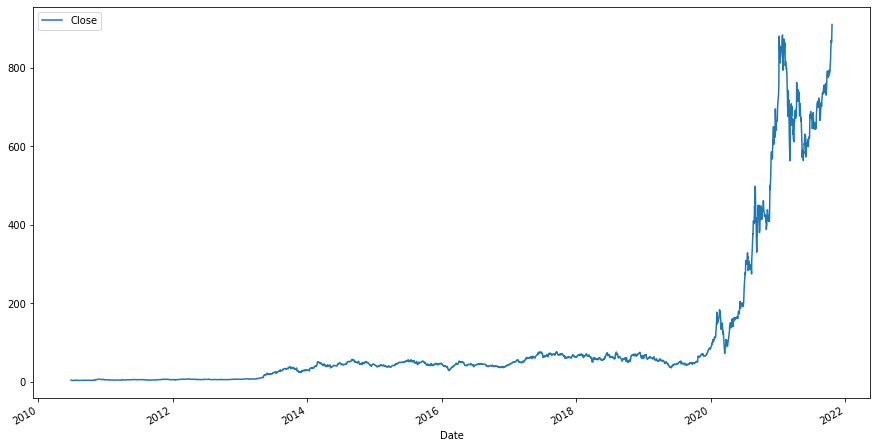

In [20]:
# Plot the closing prices for all-time
close_df.plot(figsize=(15,8))
plt.show()

In [26]:
# Forward fill in the missing days, by resampling then ffilling.
# This will carry forward the last closing price before weekend / holidays.
# You can see the difference if you run the next 2 cells without running this one
close_df=close_df.resample('D').ffill()
close_df

Close
Date                  
2010-06-29    4.778000
2010-06-30    4.766000
2010-07-01    4.392000
2010-07-02    3.840000
2010-07-03    3.840000
...                ...
2021-10-18  870.109985
2021-10-19  864.270020
2021-10-20  865.799988
2021-10-21  894.000000
2021-10-22  909.679993

[4134 rows x 1 columns]

In [ ]:
close_df.grouper

In [33]:
# THIS IS THE KEY CELL.
# Pivots the table to have day of year as index, with each column as a year and the values as the closing price.
piv_df = close_df.pivot_table(index=close_df.index.dayofyear, columns=[close_df.index.year], values="Close")
piv_df

Date   2010   2011   2012       2013       2014       2015       2016  \
Date                                                                    
1       NaN  5.326  5.712   6.774000  30.086000  44.481998  48.001999   
2       NaN  5.326  5.712   7.072000  30.020000  43.862000  48.001999   
3       NaN  5.324  5.616   6.954000  29.912001  43.862000  48.001999   
4       NaN  5.334  5.542   6.880000  29.912001  43.862000  44.681999   
5       NaN  5.366  5.424   6.880000  29.912001  42.018002  44.686001   
...     ...    ...    ...        ...        ...        ...        ...   
362   5.282  5.702  6.738  30.224001  45.563999  45.790001  43.905998   
363   5.546  5.746  6.644  30.224001  45.141998  47.438000  43.948002   
364   5.300  5.712  6.644  30.488001  44.445999  47.618000  42.936001   
365   5.326  5.712  6.644  30.086000  44.481998  48.001999  42.737999   
366     NaN    NaN  6.774        NaN        NaN        NaN  42.737999   

Date       2017       2018       2019        2020        2021  
Date                                                           
1     42.737999  62.270000  66.559998   83.666000  705.669983  
2     42.737999  64.106003  62.023998   86.052002  705.669983  
3     43.397999  63.450001  60.071999   88.601997  705.669983  
4     45.397999  62.924000  63.537998   88.601997  729.770020  
5     45.349998  63.316002  63.537998   88.601997  735.109985  
...         ...        ...        ...         ...         ...  
362   63.071999  66.774002  86.075996  661.770020         NaN  
363   62.270000  66.774002  86.075996  663.690002         NaN  
364   62.270000  66.774002  82.940002  665.989990         NaN  
365   62.270000  66.559998  83.666000  694.780029         NaN  
366         NaN        NaN        NaN  705.669983         NaN  

[366 rows x 12 columns]

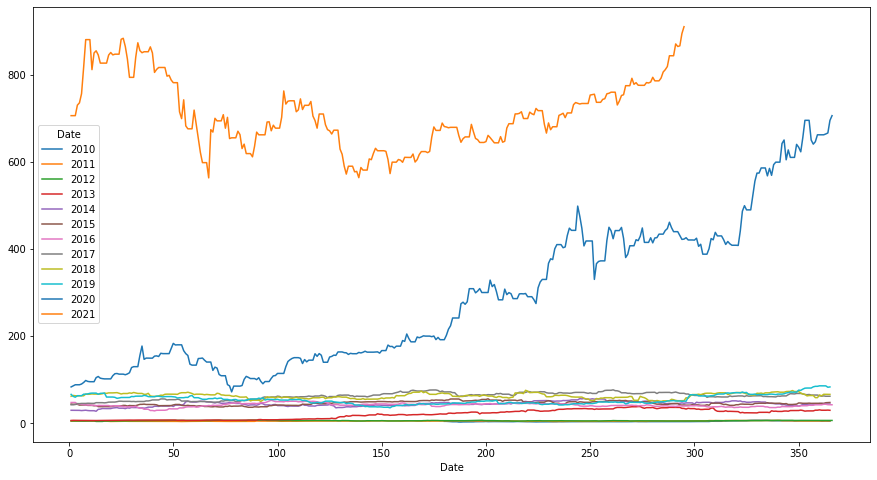

In [28]:
# Plot the data
piv_df.plot(figsize=(15,8))
plt.show()

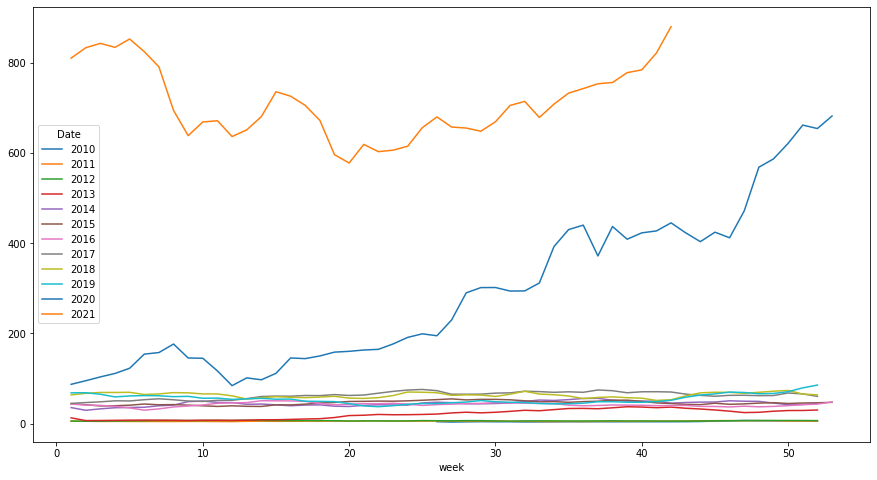

In [29]:
# Change to weekly. Could have re-sampled here, but easier to just use the week number. See how it smoothes it.
piv_weekly_df = close_df.pivot_table(index=close_df.index.isocalendar().week, columns=[close_df.index.year], values="Close")
piv_weekly_df.plot(figsize=(15,8))
plt.show()

In [30]:
# Normalise the data, so that value on Jan 1st is 100, and other days are a ratio of this.
# Allows visability of inter-year growth.
norm_df = piv_df.div(piv_df.iloc[0]).mul(100)
norm_df

Date  2010        2011        2012        2013        2014        2015  \
Date                                                                     
1      NaN  100.000000  100.000000  100.000000  100.000000  100.000000   
2      NaN  100.000000  100.000000  104.399171   99.780629   98.606180   
3      NaN   99.962442   98.319333  102.657216   99.421659   98.606180   
4      NaN  100.150205   97.023808  101.564806   99.421659   98.606180   
5      NaN  100.751032   94.957981  101.564806   99.421659   94.460688   
...    ...         ...         ...         ...         ...         ...   
362    NaN  107.059705  117.962186  446.176560  151.445850  102.940521   
363    NaN  107.885835  116.316530  446.176560  150.043202  106.645388   
364    NaN  107.247459  116.316530  450.073813  147.729836  107.050047   
365    NaN  107.247459  116.316530  444.139352  147.849491  107.913315   
366    NaN         NaN  118.592442         NaN         NaN         NaN   

Date        2016        2017        2018        2019        2020        2021  
Date                                                                          
1     100.000000  100.000000  100.000000  100.000000  100.000000  100.000000  
2     100.000000  100.000000  102.948454   93.185097  102.851817  100.000000  
3     100.000000  101.544293  101.894974   90.252405  105.899645  100.000000  
4      93.083622  106.223969  101.050264   95.459736  105.899645  103.415199  
5      93.091958  106.111656  101.679784   95.459736  105.899645  104.171922  
...          ...         ...         ...         ...         ...         ...  
362    91.467021  147.578268  107.233020  129.320913  790.966482         NaN  
363    91.554525  145.701722  107.233020  129.320913  793.261300         NaN  
364    89.446277  145.701722  107.233020  124.609383  796.010312         NaN  
365    89.033790  145.701722  106.889348  125.700125  830.420991         NaN  
366    89.033790         NaN         NaN         NaN  843.436975         NaN  

[366 rows x 12 columns]

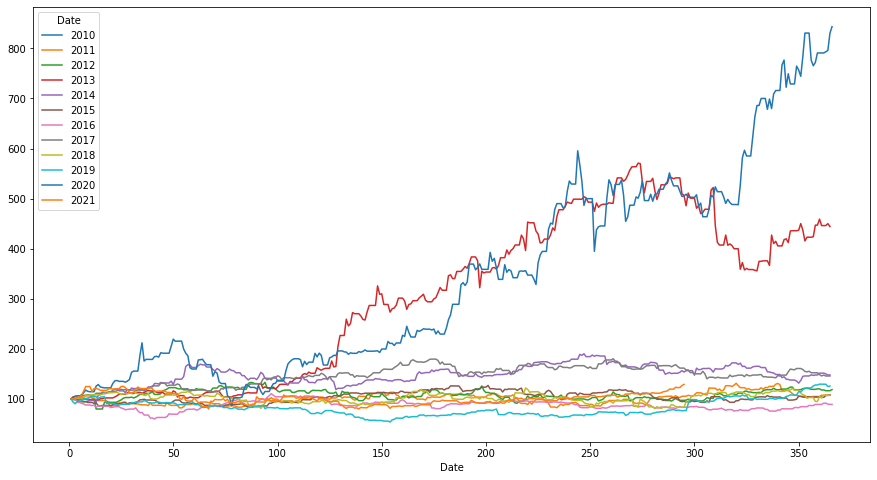

In [31]:
# Plot the normalised data
norm_df.plot(figsize=(15,8))
plt.show()

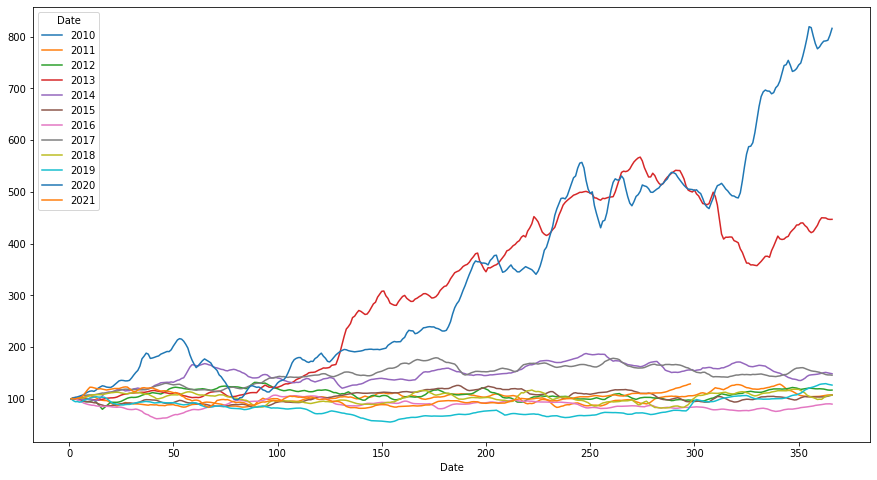

In [32]:
# Smooth it by using a rolling average.
rolling_norm_df = norm_df.rolling(4, min_periods=1).mean()
rolling_norm_df.plot(figsize=(15,8))
plt.show()